In [49]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport

In [50]:
df = pd.read_parquet('../assets/SINAN-TB_Brazil_cleaned.parquet')

In [51]:
sns.set_theme(style="whitegrid")

In [52]:
df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,06/01/2001,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,195,66.0
1,16/01/2001,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,35.0
2,16/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,54.0
3,22/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,36.0
4,03/01/2001,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,183,14.0


In [53]:
# ProfileReport(df)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DT_NOTIFIC          963961 non-null  object 
 1   CS_SEXO             963961 non-null  object 
 2   CS_RACA             963961 non-null  object 
 3   TRATAMENTO          963961 non-null  object 
 4   RAIOX_TORA          963961 non-null  object 
 5   TESTE_TUBE          963961 non-null  object 
 6   FORMA               963961 non-null  object 
 7   AGRAVAIDS           963961 non-null  object 
 8   AGRAVALCOO          963961 non-null  object 
 9   AGRAVDIABE          963961 non-null  object 
 10  AGRAVDOENC          963961 non-null  object 
 11  AGRAVOUTRA          963961 non-null  object 
 12  BACILOSC_E          963961 non-null  object 
 13  BACILOS_E2          963961 non-null  object 
 14  BACILOSC_O          963961 non-null  object 
 15  CULTURA_ES          963961 non-nul

In [87]:
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], dayfirst=True)

df['YEAR'] = df['DT_NOTIFIC'].dt.year
df['MONTH'] = df['DT_NOTIFIC'].dt.month
df['DAY'] = df['DT_NOTIFIC'].dt.day

In [88]:
df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE,YEAR,MONTH,DAY
0,2001-01-06,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Not performed,Cured,Ignored,Ignored,AC,195,66.0,2001,1,6
1,2001-01-16,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Not performed,Cured,Ignored,Ignored,AC,181,35.0,2001,1,16
2,2001-01-16,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Not performed,Cured,Ignored,Ignored,AC,181,54.0,2001,1,16
3,2001-01-22,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Not performed,Cured,Ignored,Ignored,AC,181,36.0,2001,1,22
4,2001-01-03,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Not performed,Cured,Ignored,Ignored,AC,183,14.0,2001,1,3


In [55]:
df.describe()

,DIAS_EM_TRATAMENTO,IDADE
count,963961.000000,963961.000000
mean,204.907204,39.806045
std,103.447261,17.084546
min,0.000000,0.000000
25%,181.000000,26.000000
50%,190.000000,38.000000
75%,221.000000,52.000000
max,4909.000000,120.000000


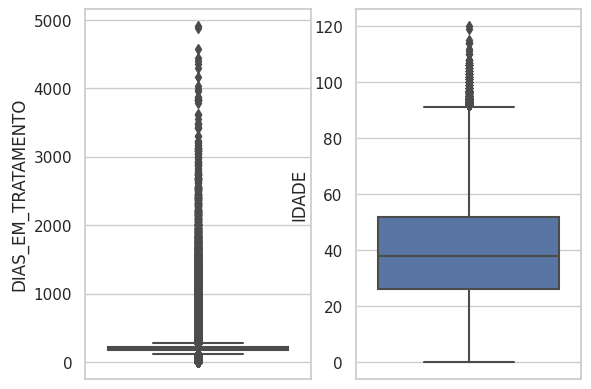

In [56]:
fig, ax = plt.subplots(1,2)

sns.boxplot(y=df['DIAS_EM_TRATAMENTO'], ax=ax[0])
sns.boxplot(y=df['IDADE'], ax=ax[1])
plt.show()

In [ ]:
df

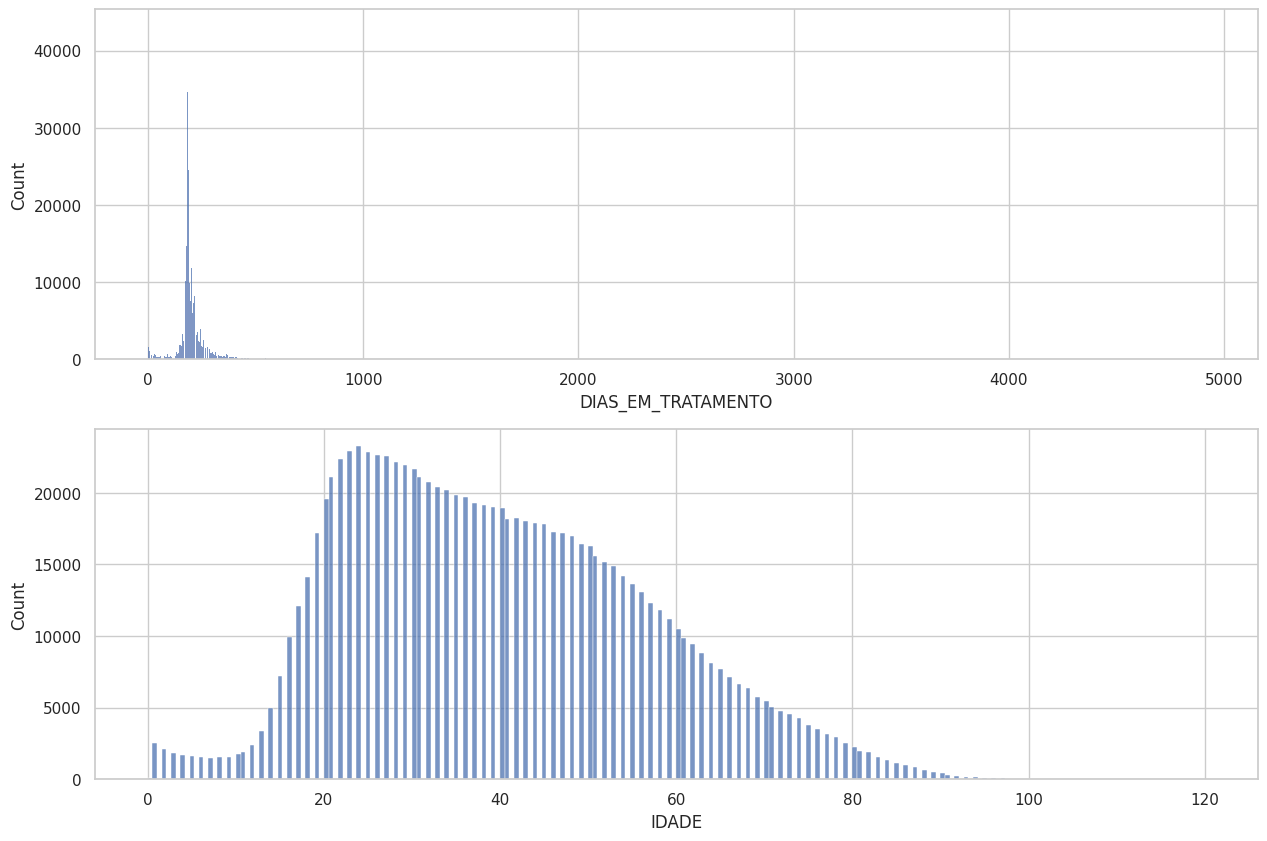

In [57]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.histplot(x=df['DIAS_EM_TRATAMENTO'], ax=ax[0])
sns.histplot(x=df['IDADE'], ax=ax[1])
plt.show()

<AxesSubplot: xlabel='DIAS_EM_TRATAMENTO', ylabel='Count'>

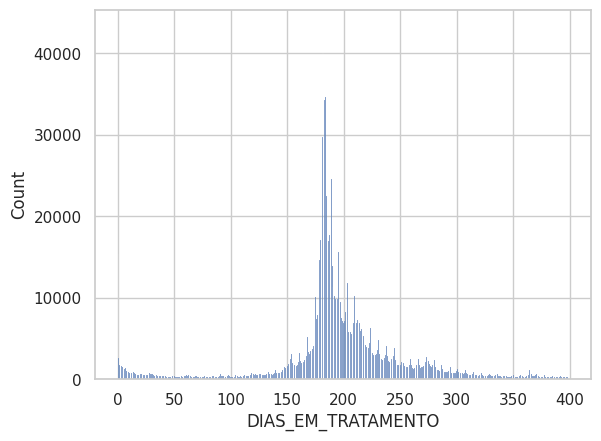

In [58]:
sns.histplot(x=df.query('DIAS_EM_TRATAMENTO < 400')['DIAS_EM_TRATAMENTO'])

In [59]:
zero_days_treat = df.query('DIAS_EM_TRATAMENTO == 0')
zero_days_treat

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
2024,20/11/2008,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Negative,Negative,Negative,Cured,Ignored,Ignored,AC,0,11.0
2253,07/07/2009,Female,White,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Negative,Not performed,Negative,Cured,Ignored,Ignored,AC,0,35.0
4190,12/08/2014,Female,Indigenous,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Ignored,Ignored,Ignored,Ignored,Died,Ignored,Ignored,AC,0,1.0
4460,18/05/2015,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Not performed,Not performed,Not performed,Not performed,Died,No,No,AC,0,47.0
4661,26/07/2016,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Ignored,Ignored,Ignored,Ignored,Cured,Ignored,Ignored,GO,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963865,26/04/2019,Male,Indigenous,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Not performed,Not performed,Not performed,Not performed,Cured,No,No,TO,0,35.0
963868,02/09/2019,Male,Admixed,Relapse,Normal,Not performed,Pulmonary,No,No,No,...,Not performed,Not performed,Not performed,Not performed,Cured,No,Yes,TO,0,60.0
963875,13/09/2019,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,Yes,...,Not performed,Not performed,Not performed,Not performed,Cured,No,No,TO,0,55.0
963876,12/04/2019,Female,Admixed,New case,Suspicious,Not performed,Extrapulmonary,No,No,No,...,Not applicable,Not applicable,Not applicable,Not applicable,Cured,No,No,TO,0,37.0


In [60]:
zero_days_treat['SITUA_ENCE'].value_counts()

Cured    8299
Died     7127
Name: SITUA_ENCE, dtype: int64

In [61]:
zero_days_treat['IDADE'].describe()

count    15426.000000
mean        45.282056
std         18.159584
min          0.000000
25%         31.000000
50%         44.000000
75%         58.000000
max        107.000000
Name: IDADE, dtype: float64

In [62]:
zero_days_treat['TRATAMENTO'].value_counts()

New case                      10922
Post-death                     1514
Re-entry after abandonment      995
Relapse                         905
Transfer                        630
Don't know                      460
Name: TRATAMENTO, dtype: int64

In [86]:
df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,2001-01-06,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,195,66.0
1,2001-01-16,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,35.0
2,2001-01-16,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,54.0
3,2001-01-22,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,36.0
4,2001-01-03,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,183,14.0


In [100]:
df = df.query('CS_SEXO != "Undefined"')

<AxesSubplot: xlabel='CS_SEXO', ylabel='count'>

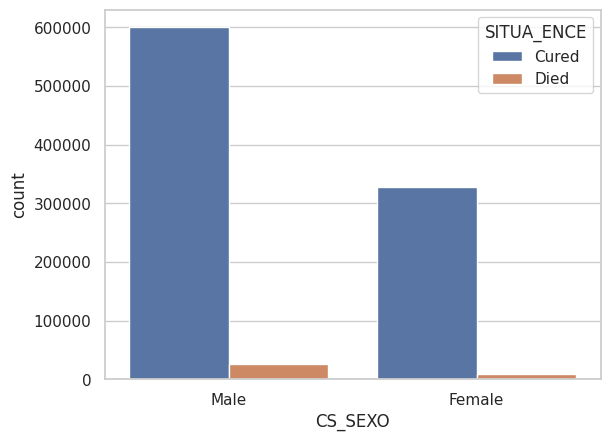

In [101]:
sns.countplot(data=df, x='CS_SEXO', hue='SITUA_ENCE', order=df['CS_SEXO'].value_counts().index)

<AxesSubplot: xlabel='CS_RACA', ylabel='count'>

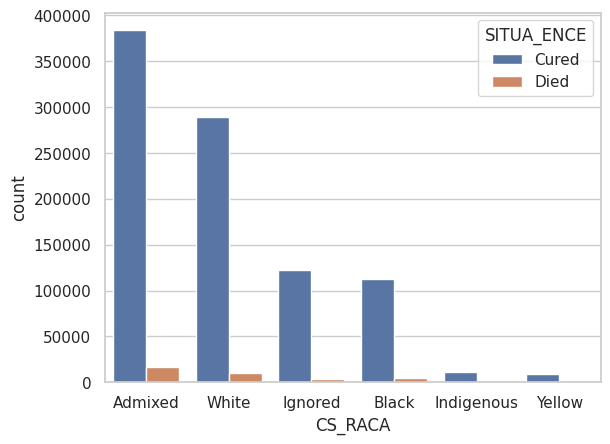

In [83]:
sns.countplot(data=df, x='CS_RACA', hue='SITUA_ENCE', order=df['CS_RACA'].value_counts().index)

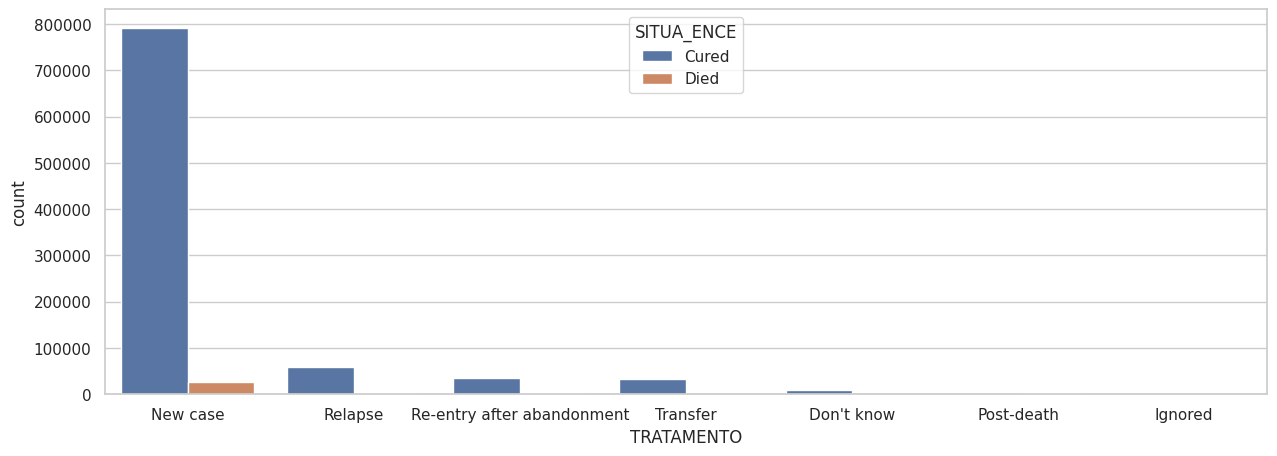

In [94]:
fig, ax = plt.subplots(figsize=(15,5))

fig = sns.countplot(data=df, x='TRATAMENTO', hue='SITUA_ENCE', order=df['TRATAMENTO'].value_counts().index)

<AxesSubplot: xlabel='IDADE', ylabel='Count'>

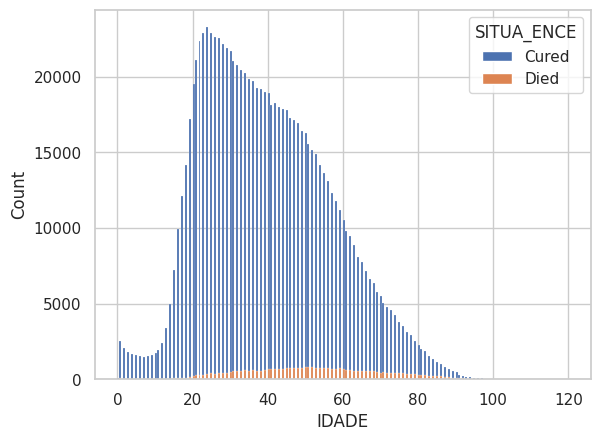

In [66]:
sns.histplot(df, x='IDADE', hue='SITUA_ENCE', alpha=1, multiple='stack')

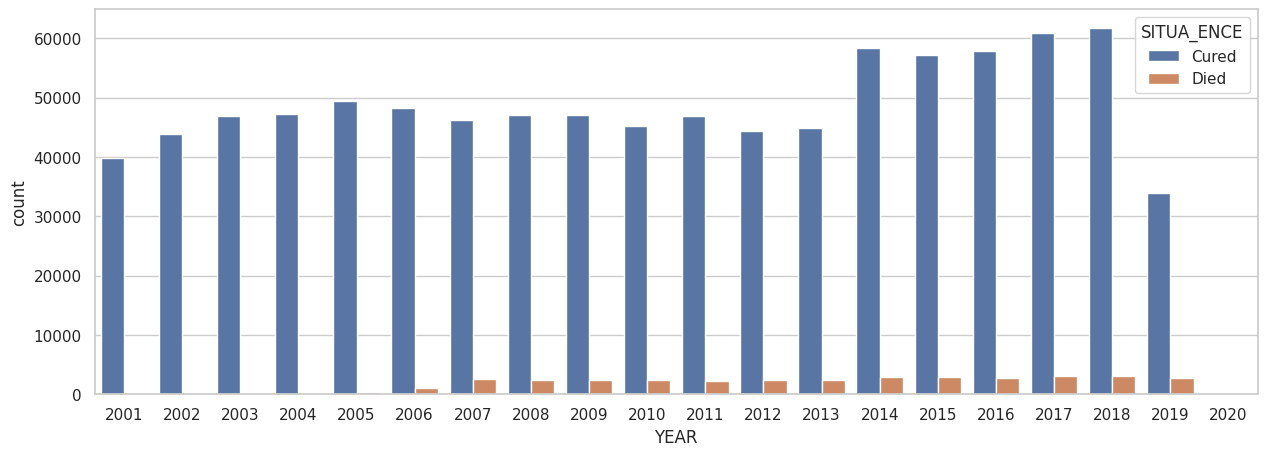

In [91]:
fig, ax = plt.subplots(figsize=(15,5))

fig = sns.countplot(data=df, x='YEAR', hue='SITUA_ENCE')

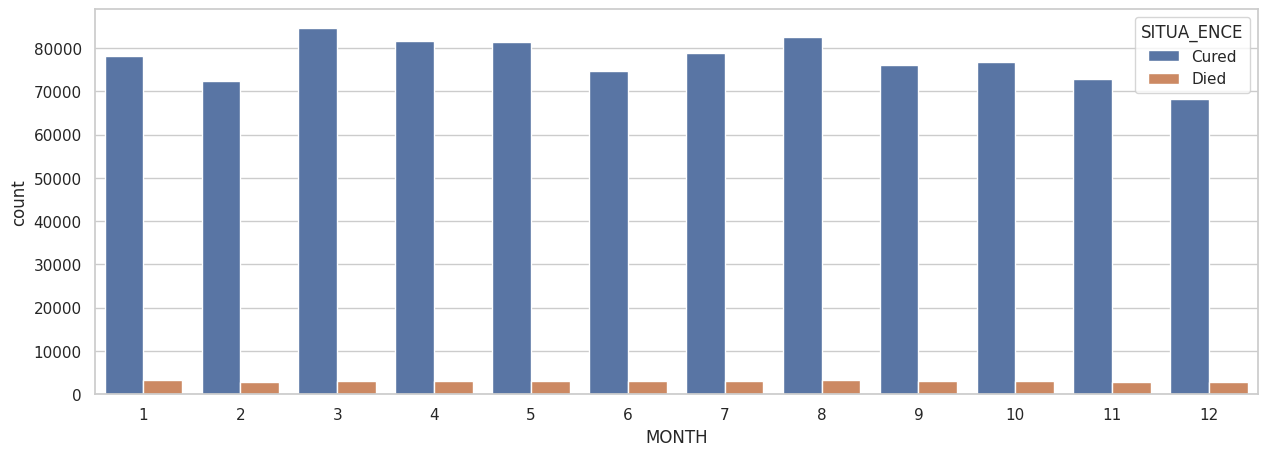

In [92]:
fig, ax = plt.subplots(figsize=(15,5))

fig = sns.countplot(data=df, x='MONTH', hue='SITUA_ENCE')

In [95]:
import json

with open('../assets/Brasil.json', 'r') as file:
    geojson = json.loads(file.read())

for feature in geojson['features']:
    feature['id'] = feature['properties']['UF']

In [97]:
import plotly.express as px

uf_couting = df['UF'].value_counts()

px.choropleth_mapbox(
    locations = uf_couting.index,
    color = uf_couting.values,
    geojson = geojson,
    mapbox_style = "carto-positron",
    # color_continuous_scale='RdBu_r',
    # range_color=(uf_couting.iloc[0], uf_couting.iloc[-1]), # min & max values from uf_couting
    center={'lat': -15.793889, 'lon': -47.882778}, # brazil
    zoom=2.5,
    height=500)

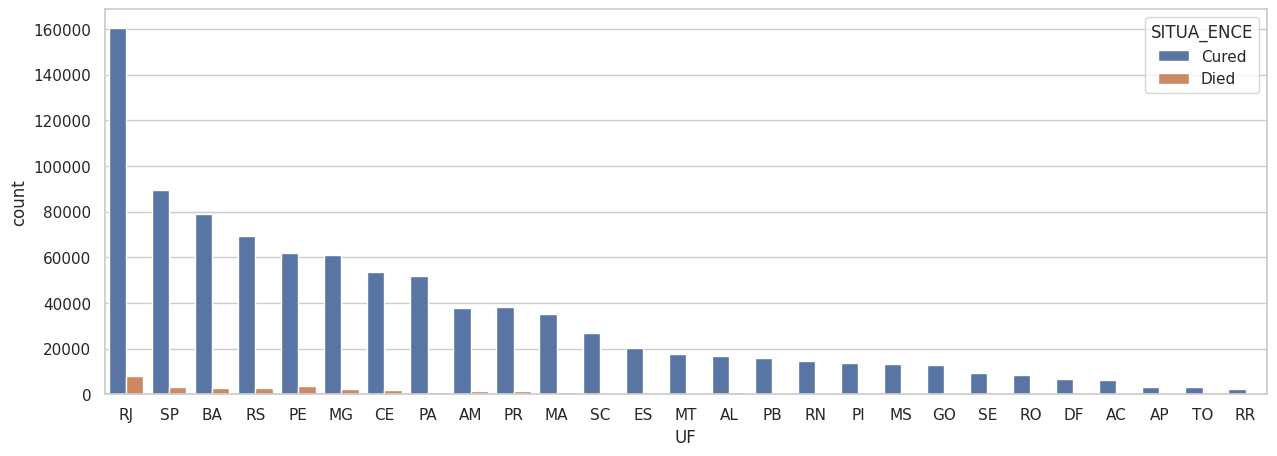

In [99]:
fig, ax = plt.subplots(figsize=(15,5))

fig = sns.countplot(data=df, x='UF', hue='SITUA_ENCE', order=df['UF'].value_counts().index)